In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from utils import miscel_tool, fft_tool

%load_ext autoreload
%autoreload 2

In [2]:
train_2_path = 'web_traffic_data/train_2.csv'
df_train = pd.read_csv(train_2_path)
df_train = miscel_tool.split_page_underscore(df_train)
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,project,device,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,16.0,27.0,29.0,23.0,54.0,38.0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,54.0,25.0,26.0,23.0,13.0,81.0,2PM,zh.wikipedia.org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,3C,zh.wikipedia.org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,6.0,16.0,19.0,30.0,38.0,4.0,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider


In [3]:
time_col = miscel_tool.extract_time_column_name(df_train)
time_col

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10'],
      dtype='object', length=803)

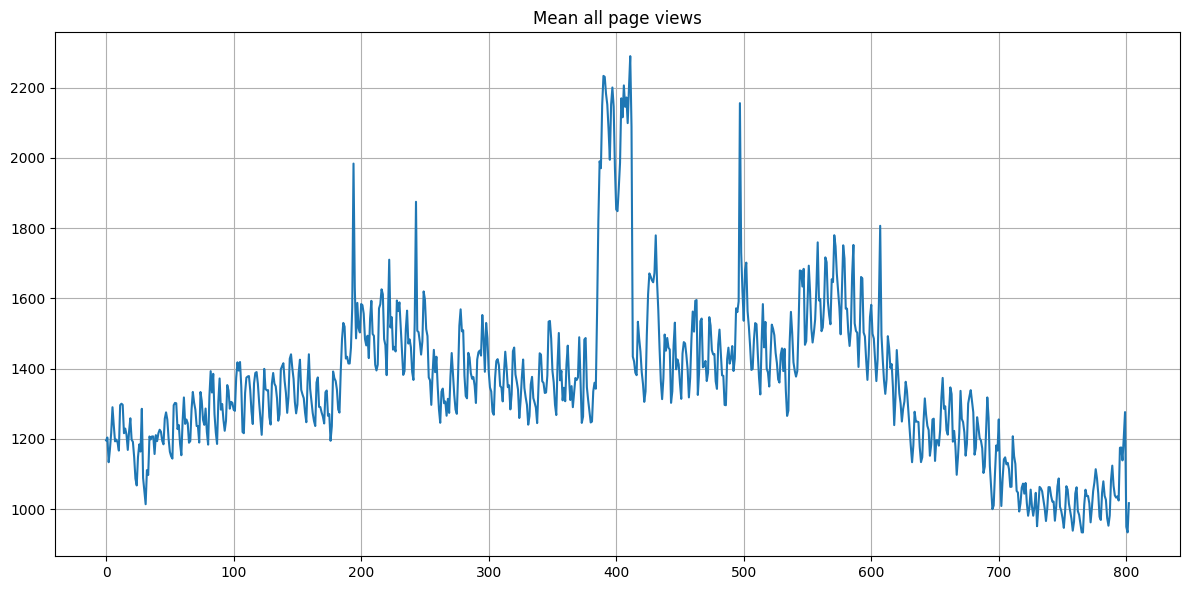

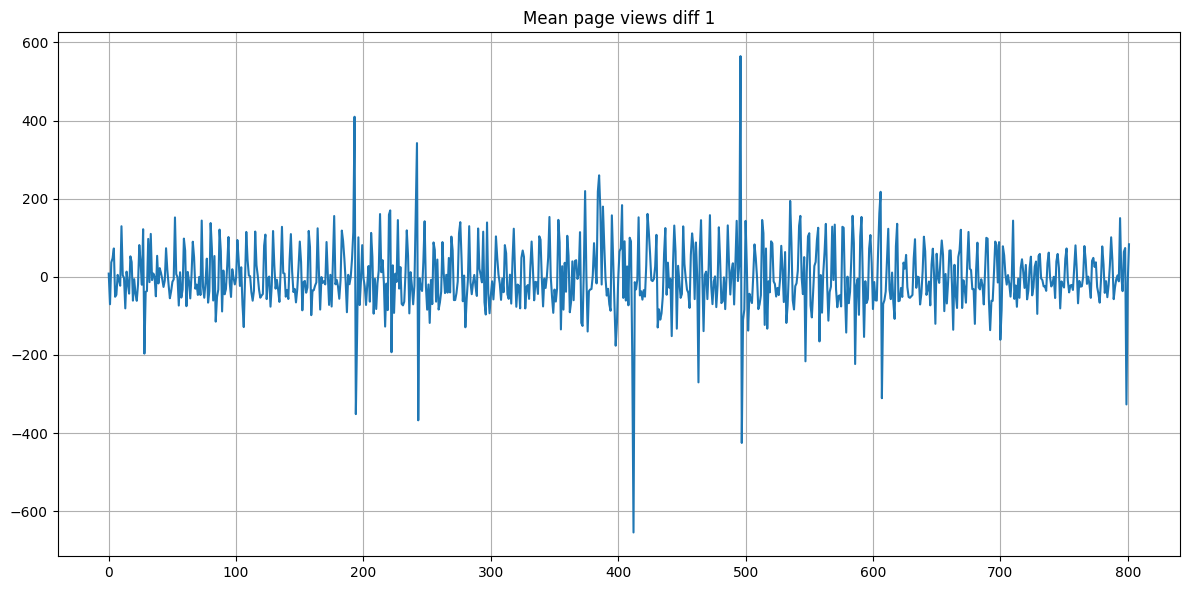

In [5]:
df_overall_mean = df_train[time_col].mean()
array_overall_mean = df_overall_mean.to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(array_overall_mean)
plt.title('Mean all page views')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(array_overall_mean[1:] - array_overall_mean[:-1])
plt.title('Mean page views diff 1')
plt.grid()
plt.tight_layout()
plt.show()

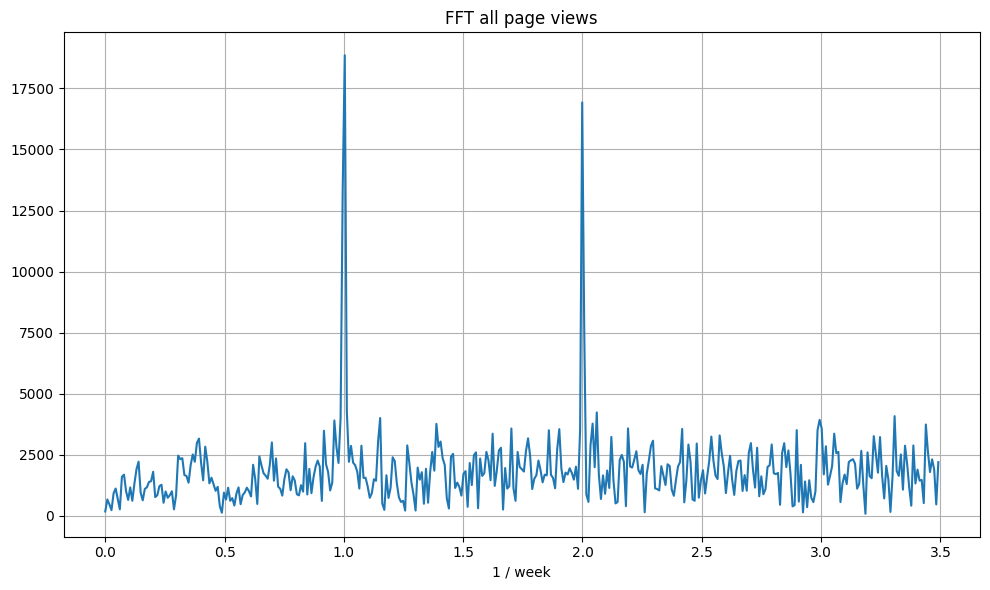

In [8]:
xf, yf = fft_tool.calc_fft(array_overall_mean)
fft_tool.plot_fft(xf, yf, title='FFT all page views',
                  fig_name='fig/fft_all_page_views.jpg')

In [9]:
np.argsort(-yf[:len(yf) // 2])[:10] / len(yf) * 7

array([1.00374065, 1.99875312, 0.99501247, 2.0074813 , 1.01246883,
       2.05985037, 3.30798005, 0.98628429, 1.1521197 , 2.99376559])

# check language

In [11]:
df_train['project'].unique()

array(['zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org',
       'commons.wikimedia.org', 'ru.wikipedia.org', 'www.mediawiki.org',
       'de.wikipedia.org', 'ja.wikipedia.org', 'es.wikipedia.org'],
      dtype=object)

In [15]:
project_list = [
    'zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org',
    'ru.wikipedia.org', 'de.wikipedia.org', 'ja.wikipedia.org',
    'es.wikipedia.org']

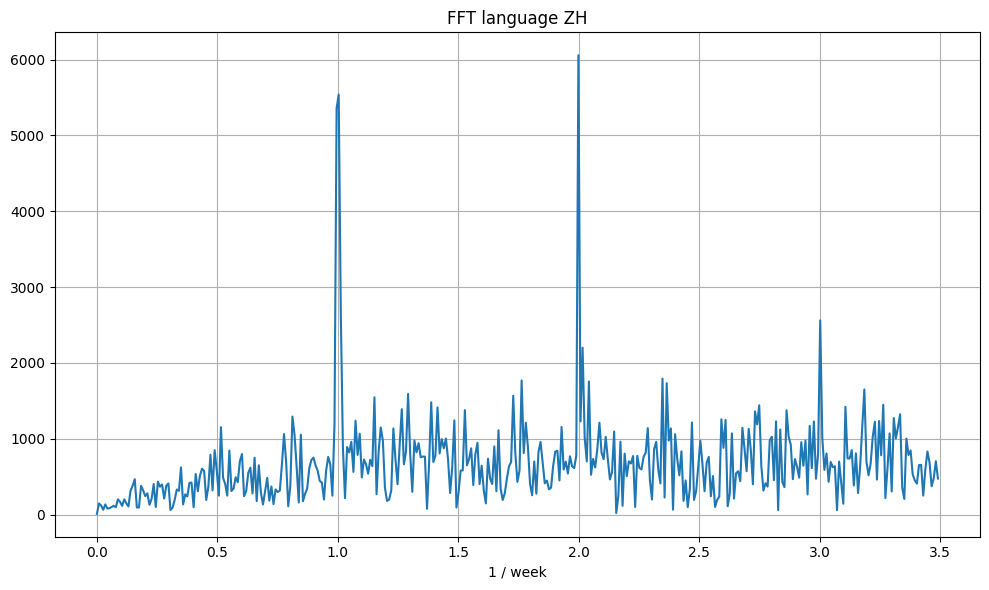

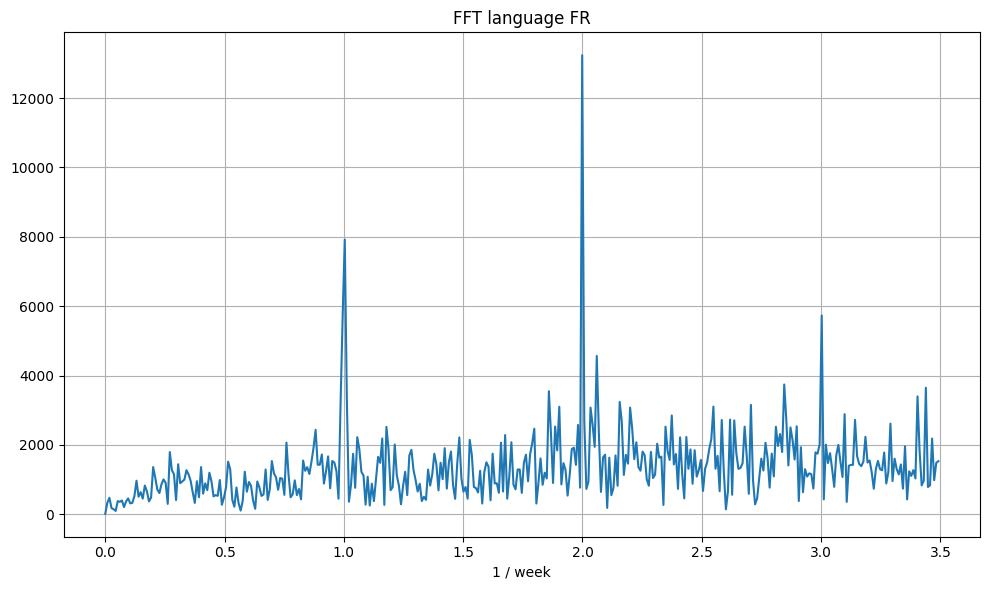

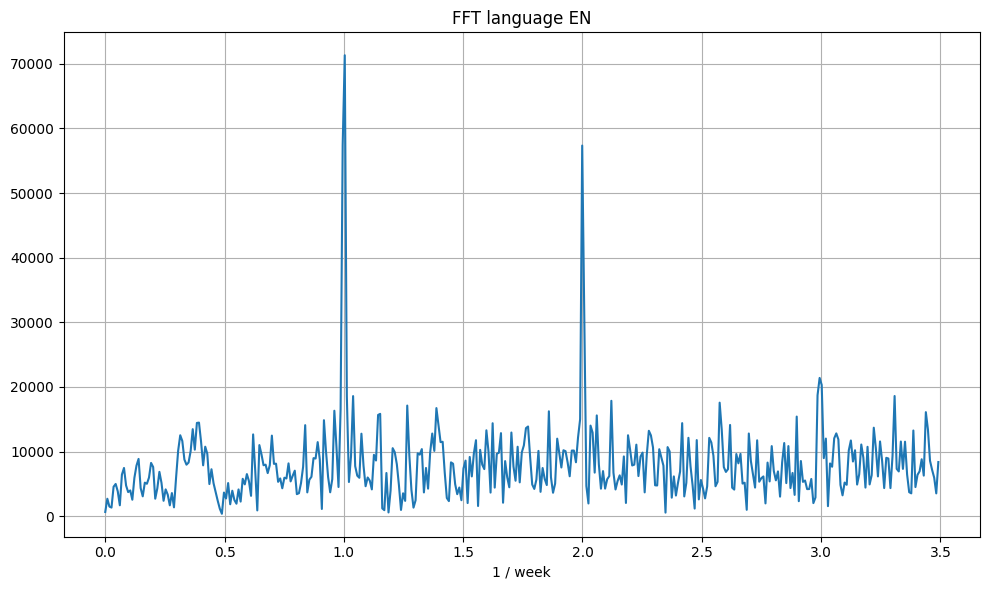

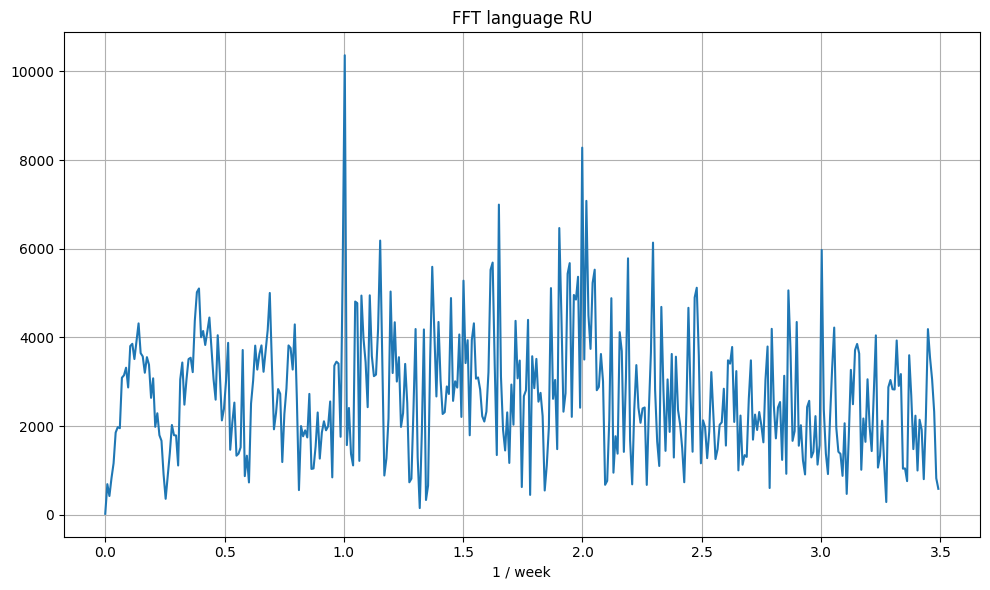

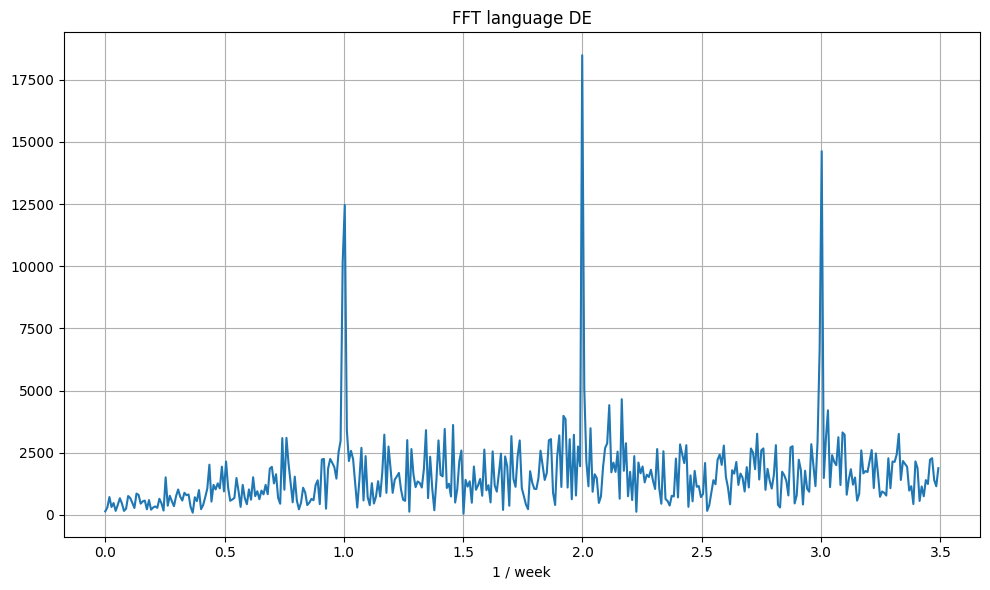

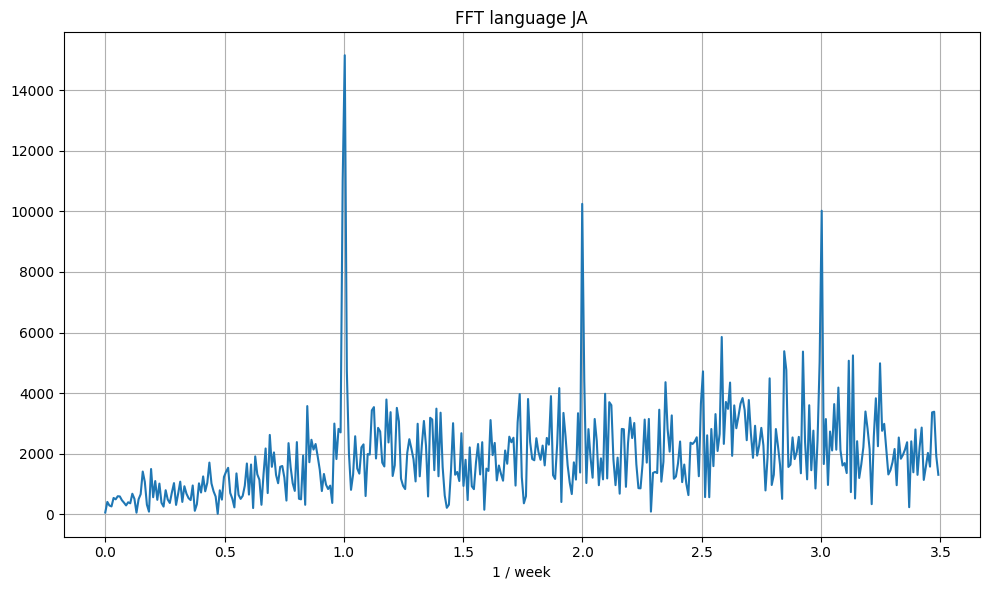

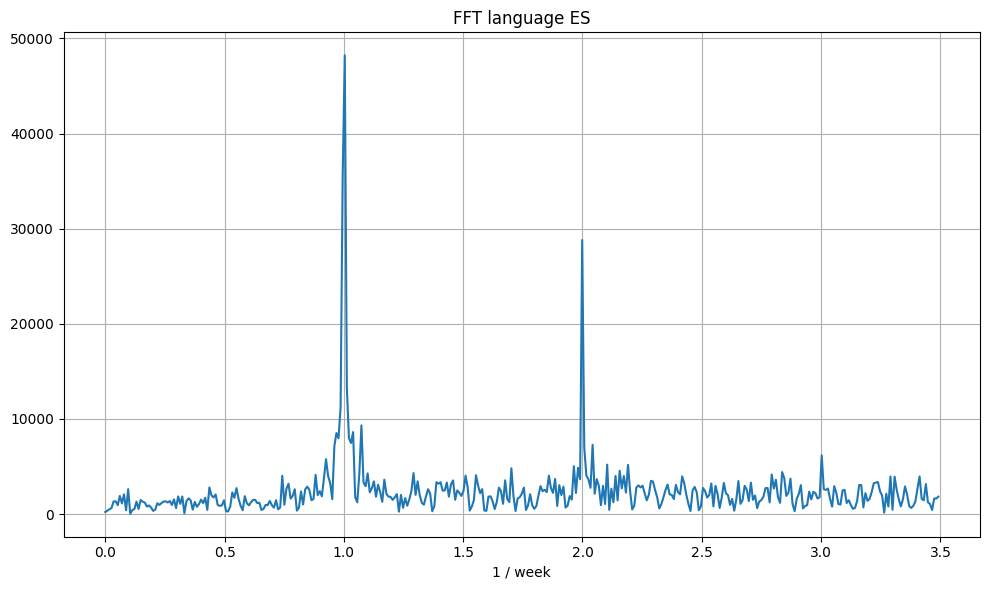

In [17]:
time_col = miscel_tool.extract_time_column_name(df_train)
for lang in project_list:
    mask_lang = df_train['project'] == lang
    df_lang = df_train.loc[mask_lang, time_col].mean()
    array_lang = df_lang.to_numpy()
    xf, yf = fft_tool.calc_fft(array_lang)
    fft_tool.plot_fft(
        xf, yf, 
        title=f'FFT language {lang[:2].upper()}',
        fig_name=f'fig/fft_{lang[:2]}')

# check special and main

In [74]:
searchfor = ["Заглавная_страница", "Служебная:Поиск", "Служебная:Ссылки_сюда", "Hauptseite", "Spezial:Suche", "Spezial:Anmelden", 'Spezial:Benutzerkonto_anlegen','Spezial:Buch',"Main_Page", "Special:Search", "Wikipedia:Portada", "Especial:Buscar", "Wikipédia:Accueil_principal", "Sp?cial:Search", "Spécial:Recherche", 'Spécial:Connexion', 'Spécial:Suivi',"Wikipedia:首页", 'メインページ']

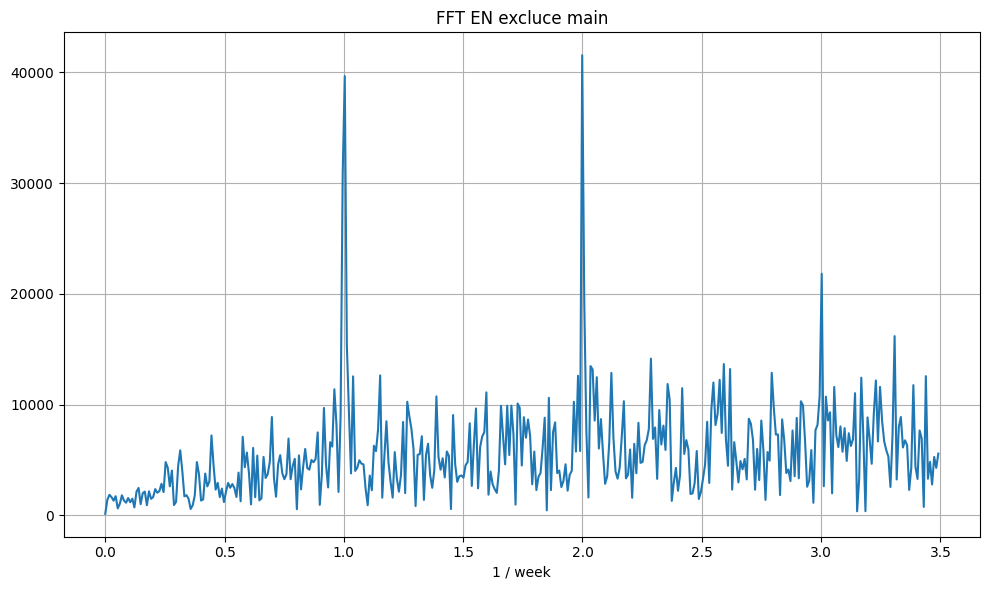

In [18]:
mask_en = df_train['project'].str.contains('en\.')
mask_main = df_train['Page'].str.contains('Main_Page|Special:')
time_col = miscel_tool.extract_time_column_name(df_train)
df_mean_not_main = df_train.loc[~mask_main & mask_en, time_col].mean()
array_mean_not_main = df_mean_not_main.to_numpy()
xf, yf = fft_tool.calc_fft(array_mean_not_main)
fft_tool.plot_fft(
    xf, yf, 
    title='FFT EN excluce main',
    fig_name='fig/fft_en_exclude_main.png'
)

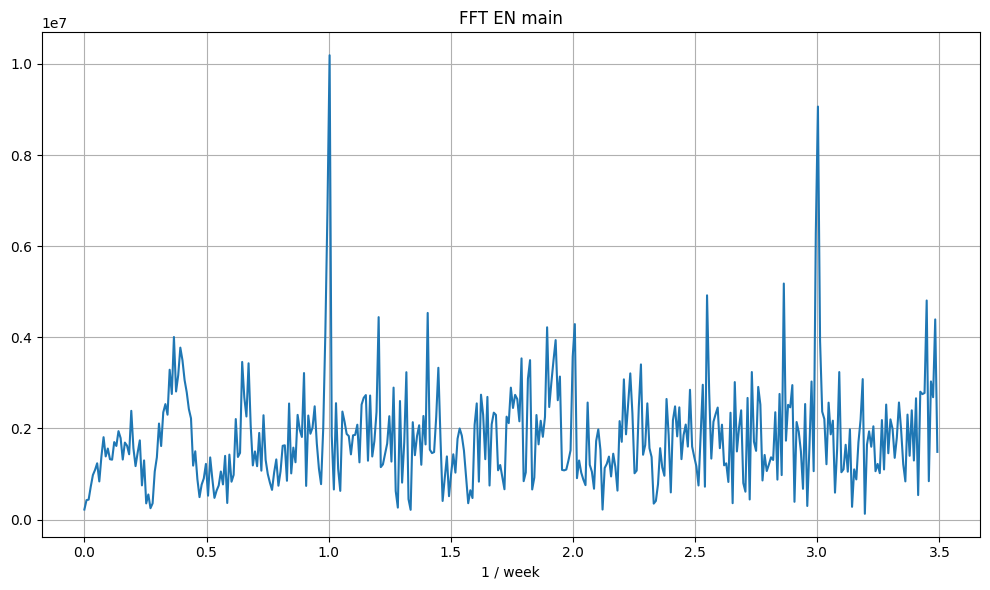

In [20]:
df_mean_only_main = df_train.loc[mask_main & mask_en, time_col].mean()
array_mean_only_main = df_mean_only_main.to_numpy()

xf, yf = fft_tool.calc_fft(array_mean_only_main)
fft_tool.plot_fft(
    xf, yf, 
    title='FFT EN main',
    fig_name='fig/fft_en_only_main.png'
)

# cheeck es (old)

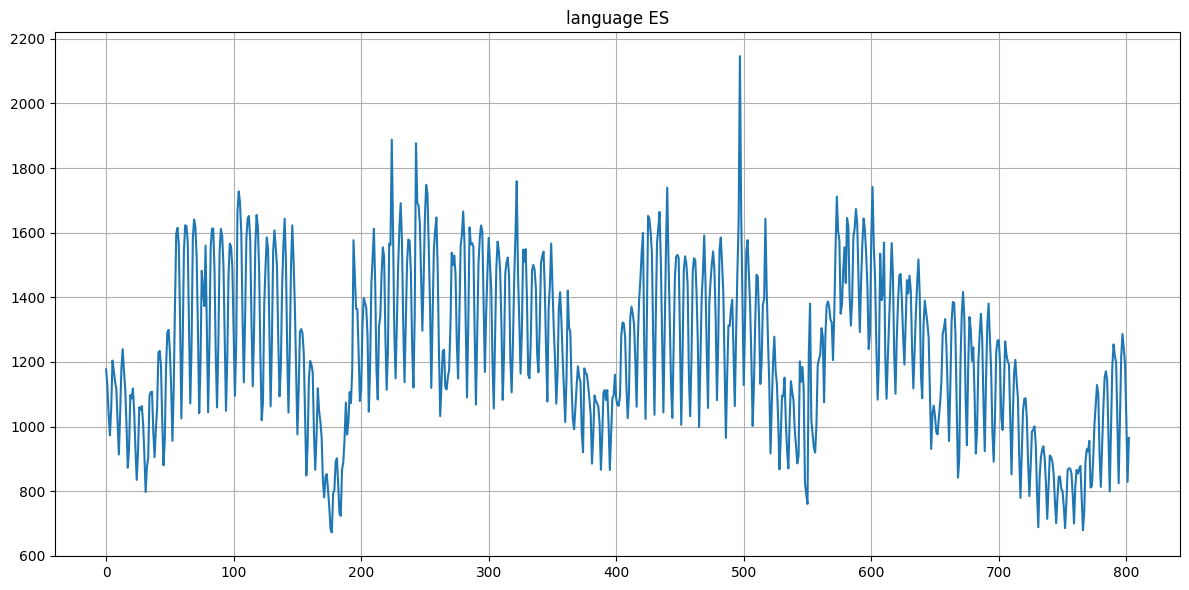

In [65]:
language_select = 'es'
mask_lang = df_train['project'].str.contains(language_select + '\.')
time_col = miscel_tool.extract_time_column_name(df_train)
df_mean_lang = df_train.loc[mask_lang, time_col].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_mean_lang.to_numpy())
plt.title(f"language {language_select.upper()}")
plt.grid()
plt.tight_layout()
plt.show()

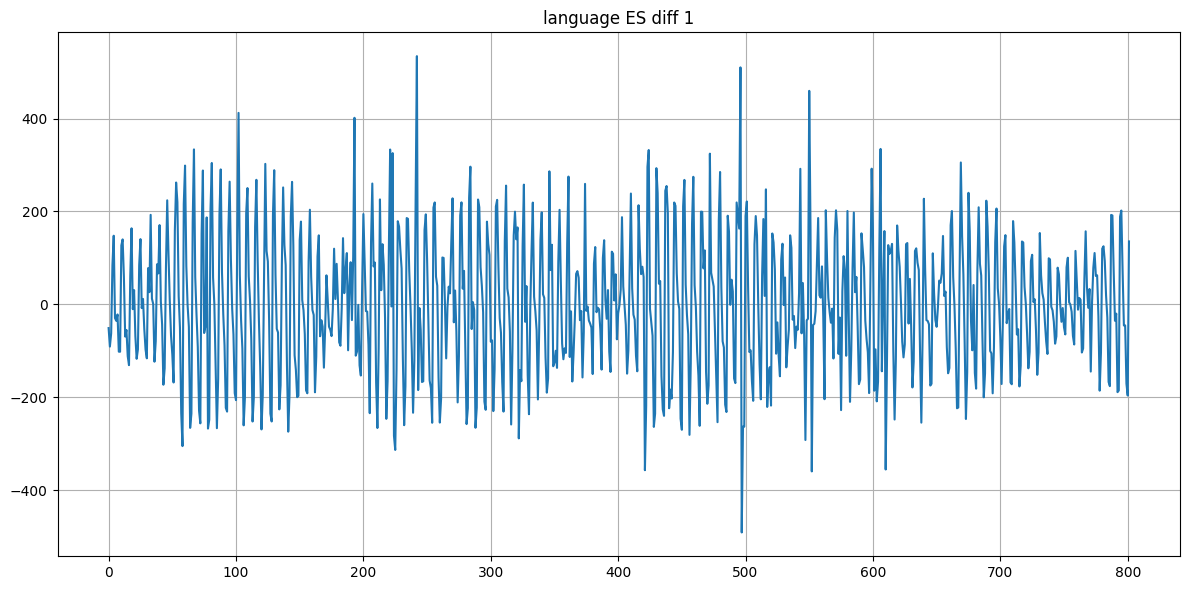

In [66]:
array_mean_lang = df_mean_lang.to_numpy()
array_diff_lang = array_mean_lang[1:] - array_mean_lang[:-1]

plt.figure(figsize=(12, 6))
plt.plot(array_diff_lang)
plt.title(f'language {language_select.upper()} diff 1')
plt.grid()
plt.tight_layout()
plt.show()

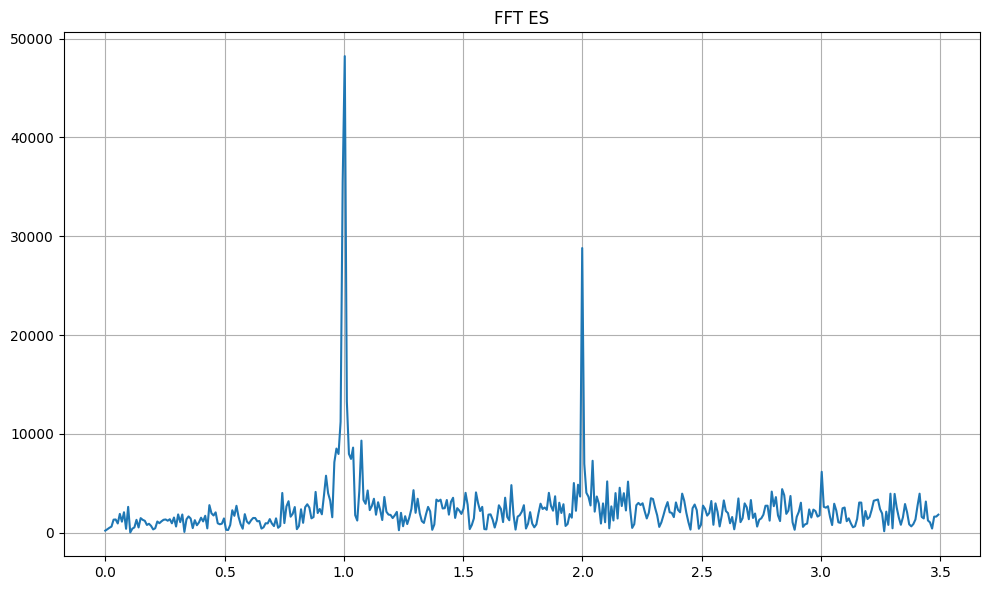

In [67]:
plt.figure(figsize=(10, 6))
yf = abs(scipy.fft.fft(array_diff_lang))
xf = np.arange(len(yf)) / len(yf) * 7
plt.plot(xf[:len(yf) // 2], yf[:len(yf) // 2])
plt.title(f'FFT {language_select.upper()}')
plt.grid()
plt.tight_layout()
plt.show()

In [68]:
np.argsort(-yf[:len(yf) // 2])[:10]

array([115, 114, 229, 116, 113, 123, 119, 111, 117, 112])

# check device

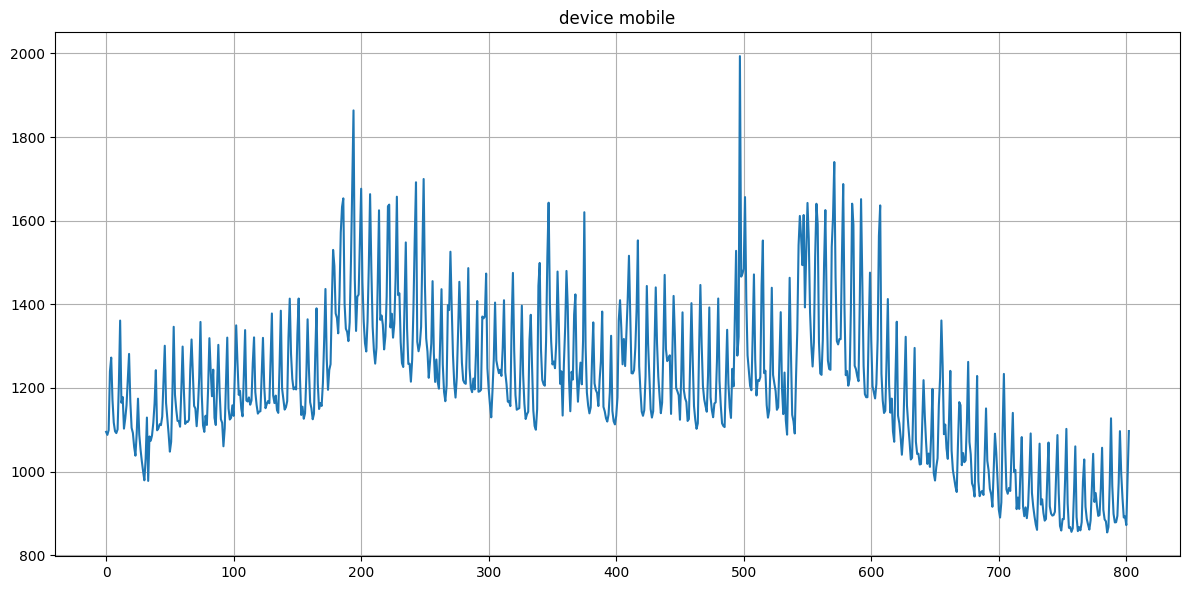

In [69]:
device_selected = 'mobile'
mask_device = df_train['device'].str.contains(device_selected)
time_col = miscel_tool.extract_time_column_name(df_train)
df_mean_device = df_train.loc[mask_device, time_col].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_mean_device .to_numpy())
plt.title(f"device {device_selected}")
plt.grid()
plt.tight_layout()
plt.show()

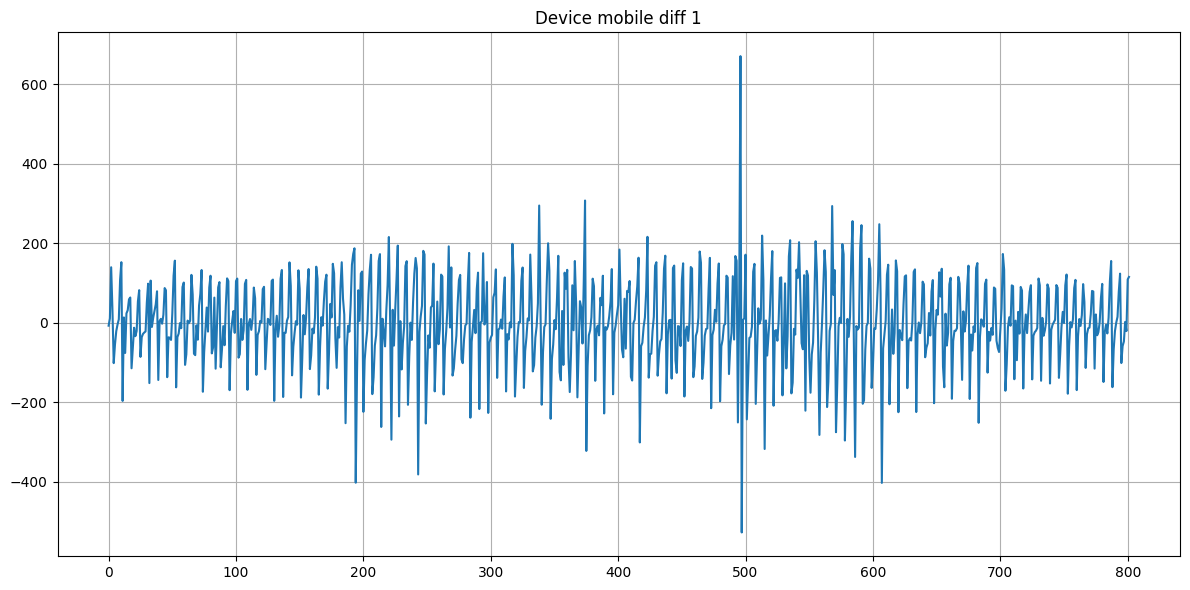

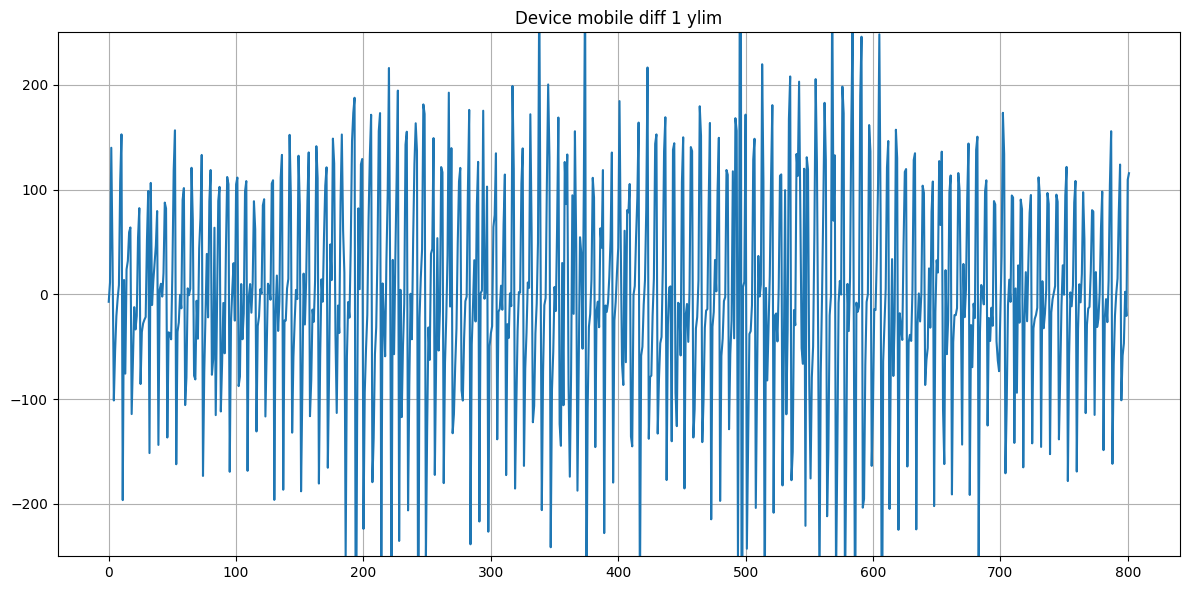

In [70]:
array_mean_device = df_mean_device.to_numpy()
array_diff_device = array_mean_device[1:] - array_mean_device[:-1]

plt.figure(figsize=(12, 6))
plt.plot(array_diff_device)
plt.title(f'Device {device_selected} diff 1')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(array_diff_device)
plt.title(f'Device {device_selected} diff 1 ylim')
plt.ylim(-250, 250)
plt.grid()
plt.tight_layout()
plt.show()

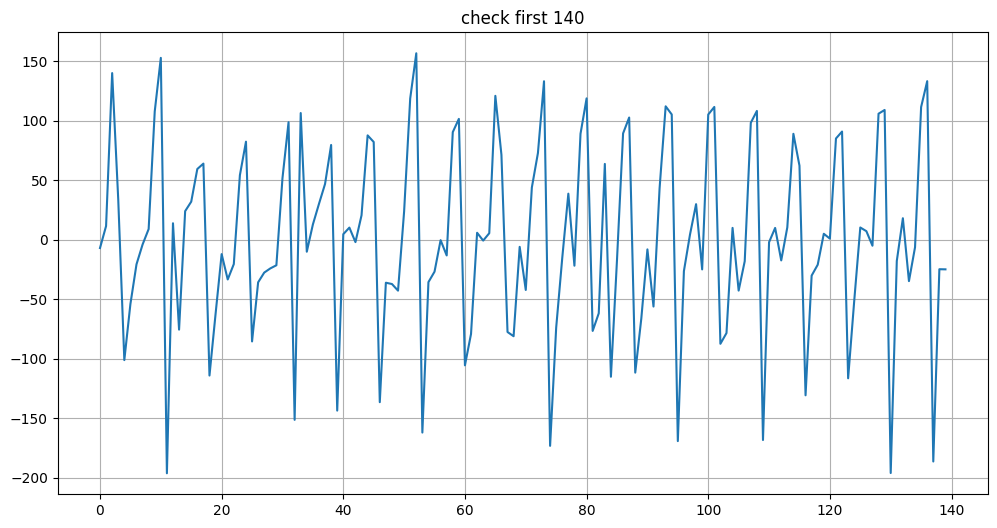

In [71]:
first_n = 7 * 20
plt.figure(figsize=(12, 6))
plt.plot(np.arange(first_n), array_diff_device[:first_n])
plt.title(f'check first {first_n}')
plt.grid()
plt.show()

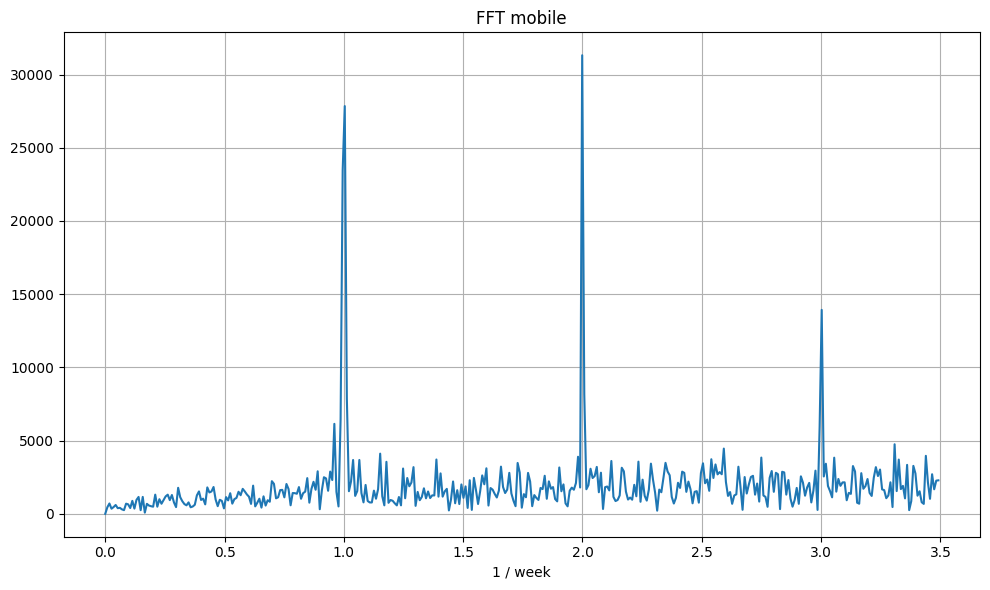

In [72]:
plt.figure(figsize=(10, 6))
xf = np.arange(len(yf)) / len(yf) * 7
yf = abs(scipy.fft.fft(array_diff_device))
cut_off = len(yf) // 2
plt.plot(xf[:cut_off], yf[:cut_off])
plt.title(f'FFT {device_selected}')
plt.xlabel('1 / week')
plt.grid()
plt.tight_layout()
plt.show()

In [73]:
np.argsort(-yf[:len(yf) // 2])[:10]

array([229, 115, 114, 344, 230, 116, 113, 110, 343, 379])